<a href="https://colab.research.google.com/github/Min-Thway-Htut/B104-Final-Assignment/blob/master/k_neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Assignment
###  Artifical Intelligence & Machine Learning

by

Min Thway Htut - GH1023126




## Problem Statement

### Which factors led students to drop out of school?

The main purpose of this machine learning pipeline is to explore the relationship between student dropout rate and the factors that make it happen.

It is very important to understand this matter as education plays a vital role in every country. Additionally, high dropout rates can lead to economic decline, increased crime, poor health, and so on.

## Data collection

A related dataset was collected on Kaggle website. Please follow the link below to see the dataset.



In [1]:
import pandas as pd
import sklearn.model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.compose
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.metrics
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

As a first step, necessary libraries for the pipeline are imported.

In [2]:
df = pd.read_csv('/content/student dropout.csv')
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

print("df size", df.shape)
print("df train size", df_train.shape)
print("df test size", df_test.shape)

df size (649, 34)
df train size (486, 34)
df test size (163, 34)


Before working on the other steps, the data is split into train data and test data(75% for the train data and 25% for the test data).

## Data Exploration

In [4]:
df_train.dtypes

,0
School,object
Gender,object
Age,int64
Address,object
Family_Size,object
Parental_Status,object
Mother_Education,int64
Father_Education,int64
Mother_Job,object
Father_Job,object


We find out that our dataset consists of different data type such as int64, float, and boolean.

In [5]:
df.isnull().sum()

,0
School,0
Gender,0
Age,0
Address,0
Family_Size,0
Parental_Status,0
Mother_Education,0
Father_Education,0
Mother_Job,0
Father_Job,0


It is important to check if there were any missing value or null value in each column.
In this case, there is no missing value in our dataset.

<Axes: >

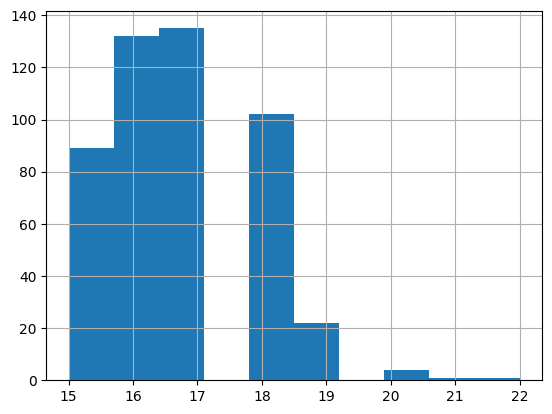

In [6]:
df_train["Age"].hist()

According to the generated figure, the age varies from 15 to 22.

<Axes: xlabel='Gender'>

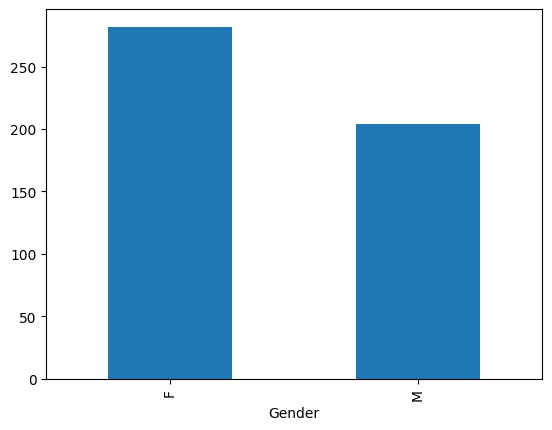

In [7]:
df_train["Gender"].value_counts().plot(kind="bar")

There are 279 females and 207 male in our train dataset.

<Axes: xlabel='Dropped_Out'>

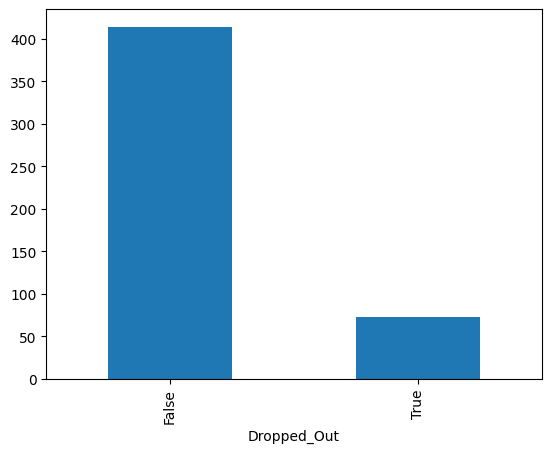

In [8]:
df_train["Dropped_Out"].value_counts().plot(kind="bar")

This figure suggests that our target variable suffers a class imbalance,
necessitating a particular sampling method.

## Data Preprocessing

In [9]:
x_train = df_train.drop(["Dropped_Out"], axis=1)
y_train = df_train["Dropped_Out"]
x_test = df_test.drop(["Dropped_Out"], axis=1)
y_test = df_test["Dropped_Out"]

print("x_train size:", x_train.shape)
print("y_test size:",y_train.shape)
print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)

x_train size: (486, 33)
y_test size: (486,)
x_train size: (486, 33)
y_train size: (486,)


We seperate features and target variables for training and testing variables.

In [10]:
x_train_encoded = pd.get_dummies(x_train, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, drop_first=True)

Using one-hot encoding, we convert categorical variables of the train dataset and test dataset into numercial ones.

In [11]:
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)

After that, we make sure that both train and test sets have the same columns

In [12]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_encoded, y_train)

In [13]:
print("Resampled class distribution in y_train:")
print(y_train_resampled.value_counts())

Resampled class distribution in y_train:
Dropped_Out
True     414
False    414
Name: count, dtype: int64


As a result, our target variables are balanced finally.

## Feature Engineering

In [14]:
categorical_attributes = x_train.select_dtypes(["object"]).columns
numerical_attributes = x_train.select_dtypes(["int64"], "float64").columns

ct = sklearn.compose.ColumnTransformer([
    ("one-encoder",sklearn.preprocessing.OneHotEncoder(handle_unknown = "ignore"), categorical_attributes),
   ("scaling", sklearn.preprocessing.StandardScaler(), numerical_attributes )
])
ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

print("x_train size:", x_train.shape)
print("x_test size:", x_test.shape)

x_train size: (486, 59)
x_test size: (163, 59)


We differentiate categorical and numerical columns, targeting "object" data type for the categorical attributes and "int64" and "float64" data types for the numerical attributes.

In this case, ColumnTrasnformer is used to apply transformations to columns of the dataset. We use OneHotEncoder to convert categorical variables into binary columns while StandardScaler is used for the numerical features.

## Model Training

In [23]:
model = sklearn.linear_model.LogisticRegression(max_iter = 500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

Logistic Regression Model is applied for the binary classification with the purpose of predicting if a student will drop out or not.

In [24]:
pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])


As a next step, we define our pipeline and the pipeline will train RandomForestClassifier algorithm on our preprocessed data.

In [17]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
}

To tune hyperparameter(classifier__n_estimators and classfier__max_depth), we define parameter grid.

In [18]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy')

Then, we set up GridSearchCV function for hyperparameter tuning.

## Testing the Model

In [29]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
accuracy

0.9386503067484663

Finally, we test our model with train dataset. As a result, our model achieves 93.86% of accuracy and we can assume it is a strong performance of our model in classifying student dropout cases.

In [26]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       135
        True       1.00      1.00      1.00        28

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163



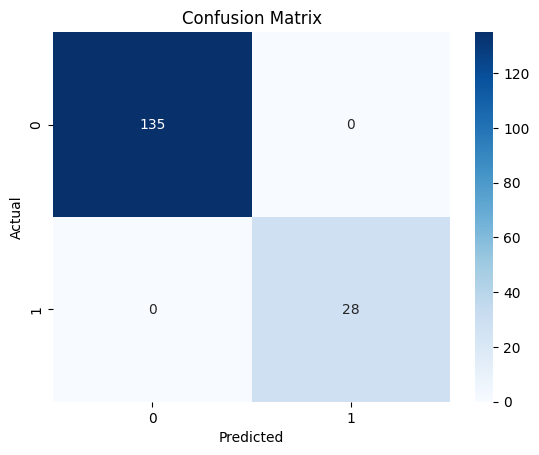

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()